In [1]:
import pandas as pd
import os
os.chdir("E:\KAGGLE\KAGGLE\classified data\Feature Engineering_1")
hr = pd.read_csv("Employee Turnover data.csv")
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
hr['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Renames columns from sales to department

In [3]:
hr=hr.rename(columns={'sales':'department'})
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Our data is pretty clean, with no missing values, so let’s move further and see how many employees work in the organization:

In [26]:
print(hr.shape)
print("\nThere are 14,999 employees in this organization")

(14999, 19)

There are 14,999 employees in this organization


In [6]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
hr=hr.rename(columns={'sales':'department'})

Let’s add all the “technical”, “support” and “IT” columns into one column to make our analysis easier.

In [8]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

## Creating Variables for Categorical Variables
As there are two categorical variables (department, salary) in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [9]:
hr=pd.get_dummies(hr,columns=['department','salary'])

In [10]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [11]:
hr.columns.unique().tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

The outcome variable is “left”, and all the other variables are predictors.

In [12]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

# Feature Selection for Employee Turnover Prediction

Let’s use the feature selection method to decide which variables are the best option that can predict employee turnover with great accuracy. There are a total of 18 columns in X, and now let’s see how we can select about 10 from them:

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 8 1 1 1 1 6 1 1 7 4 9 5 1 1 2]


You can see that or feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now lets have a look at these columns:

In [14]:
['satisfaction_level',
 'last_evaluation',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_hr',
 'department_management',
 'salary_high',
 'salary_low']

['satisfaction_level',
 'last_evaluation',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_hr',
 'department_management',
 'salary_high',
 'salary_low']

In [15]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

# Logistic Regression Model to Predict Employee Turnover

To ensure that we'll get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the random_state parameter i.e random_state=0

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [17]:
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (10499, 10)
y_train shape: (10499,)


In [18]:
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_test shape: (4500, 10)
y_test shape: (4500,)


Let’s check the accuracy of our logistic regression model.

In [19]:
from sklearn.metrics import accuracy_score
print("Logistic regression accuracy: {:.3f}".format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic regression accuracy: 0.771


# Random Forest Classification Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Now let’s check the accuracy of our Random Forest Classification Model:

In [21]:
print("Random Forest Classifier: {:.3f}",format(accuracy_score(y_test,rf.predict(X_test))))

Random Forest Classifier: {:.3f} 0.9775555555555555


# Confusion Matrix for our Machine Learning Models

Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification.

## Random Forest

In [22]:
from sklearn.metrics import classification_report
print("classification Report:\n")
print(classification_report(y_test,rf.predict(X_test)))

classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.94      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Confusion Matrix:



Text(0.5, 1.0, 'Random Forest')

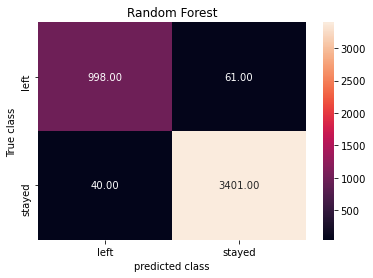

In [23]:
y_pred=rf.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm=metrics.confusion_matrix(y_pred,y_test,[1,0])
print("Confusion Matrix:\n")
sns.heatmap(forest_cm,annot=True,fmt='.2f',xticklabels=['left','stayed'],yticklabels=['left','stayed'])
plt.ylabel('True class')
plt.xlabel('predicted class')
plt.title('Random Forest')

# Employee Turnover Prediction Curve

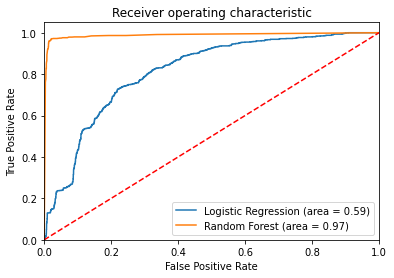

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee turnover, now let’s have a look at the feature importance of our random forest classification model.

In [25]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.23%
department_management-0.26%
department_RandD-0.29%
department_hr-0.30%
salary_high-0.66%
salary_low-1.15%
Work_accident-1.42%
last_evaluation-18.33%
time_spend_company-25.99%
satisfaction_level-51.38%


According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will leave the company, in ascending order.

### Kindly read further with regards to confusion and classification matrices:




True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

False Positives (FP) – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

False Negatives (FN) – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.

Once you understand these four parameters then we can calculate Accuracy, Precision, Recall and F1 score.

Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

So, whenever you build a model, this article should help you to figure out what these parameters mean and how good your model has performed.

I hope you found this blog useful. Please leave comments or send me an email if you think I missed any important details or if you have any other questions or feedback about this topic.

**Please Note that the above results and analysis of numbers is based on the Titanic model. Your numbers and results may vary upon which model you work on and your specific business use case.
